# 犬猫分類

- 注意点
    - E資格を受験される方は精度６５％以上を出してください    
    - 要提出


data フォルダに格納されている dog と cat の２クラスの画像を分類するモデルを作成せよ。

サンプル数
dog:250枚
cat:250枚

訓練データ:全体の 70% をランダムに（seed=0）

Accuracy が Validation のデータに対して 65% 得られていること

In [1]:
#　警告メッセージを出させないためのコマンド
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ファイルにアクセスするためのモジュールをインポート
from glob import glob

In [3]:
# 犬の画像にアクセスするパスを取得
dog_filepaths = glob('data/dog/*.jpg')
dog_filepaths

['data/dog/308.jpg',
 'data/dog/376.jpg',
 'data/dog/180.jpg',
 'data/dog/353.jpg',
 'data/dog/194.jpg',
 'data/dog/13.jpg',
 'data/dog/343.jpg',
 'data/dog/3.jpg',
 'data/dog/146.jpg',
 'data/dog/53.jpg',
 'data/dog/396.jpg',
 'data/dog/16.jpg',
 'data/dog/310.jpg',
 'data/dog/144.jpg',
 'data/dog/91.jpg',
 'data/dog/90.jpg',
 'data/dog/69.jpg',
 'data/dog/77.jpg',
 'data/dog/290.jpg',
 'data/dog/390.jpg',
 'data/dog/321.jpg',
 'data/dog/27.jpg',
 'data/dog/277.jpg',
 'data/dog/318.jpg',
 'data/dog/75.jpg',
 'data/dog/21.jpg',
 'data/dog/153.jpg',
 'data/dog/179.jpg',
 'data/dog/55.jpg',
 'data/dog/5.jpg',
 'data/dog/244.jpg',
 'data/dog/33.jpg',
 'data/dog/206.jpg',
 'data/dog/254.jpg',
 'data/dog/76.jpg',
 'data/dog/59.jpg',
 'data/dog/142.jpg',
 'data/dog/242.jpg',
 'data/dog/198.jpg',
 'data/dog/220.jpg',
 'data/dog/89.jpg',
 'data/dog/39.jpg',
 'data/dog/241.jpg',
 'data/dog/18.jpg',
 'data/dog/252.jpg',
 'data/dog/125.jpg',
 'data/dog/164.jpg',
 'data/dog/253.jpg',
 'data/dog/31

In [4]:
# 猫の画像にアクセスするパスを取得
cat_filepaths = glob('data/cat/*.jpg')
cat_filepaths

['data/cat/115.jpg',
 'data/cat/262.jpg',
 'data/cat/94.jpg',
 'data/cat/13.jpg',
 'data/cat/3.jpg',
 'data/cat/146.jpg',
 'data/cat/128.jpg',
 'data/cat/53.jpg',
 'data/cat/16.jpg',
 'data/cat/310.jpg',
 'data/cat/144.jpg',
 'data/cat/91.jpg',
 'data/cat/90.jpg',
 'data/cat/302.jpg',
 'data/cat/224.jpg',
 'data/cat/275.jpg',
 'data/cat/69.jpg',
 'data/cat/99.jpg',
 'data/cat/290.jpg',
 'data/cat/119.jpg',
 'data/cat/134.jpg',
 'data/cat/103.jpg',
 'data/cat/277.jpg',
 'data/cat/280.jpg',
 'data/cat/52.jpg',
 'data/cat/48.jpg',
 'data/cat/75.jpg',
 'data/cat/21.jpg',
 'data/cat/153.jpg',
 'data/cat/117.jpg',
 'data/cat/131.jpg',
 'data/cat/256.jpg',
 'data/cat/105.jpg',
 'data/cat/179.jpg',
 'data/cat/55.jpg',
 'data/cat/170.jpg',
 'data/cat/162.jpg',
 'data/cat/231.jpg',
 'data/cat/5.jpg',
 'data/cat/33.jpg',
 'data/cat/111.jpg',
 'data/cat/254.jpg',
 'data/cat/311.jpg',
 'data/cat/76.jpg',
 'data/cat/59.jpg',
 'data/cat/142.jpg',
 'data/cat/242.jpg',
 'data/cat/198.jpg',
 'data/cat/2

In [5]:
# 必要なモジュールのインポート
from PIL import Image
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

#TensorFlowとKerasのインポート
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


#### 実装の手順
*データの準備*  
0. 前準備:画像データのパスをすべて取得して、リストに格納する（繰り返し処理のため） 
1. 画像データの読込  
2. 教師データの用意  

*モデルの構築*
- CNNの構築
- Conv + Poolingの回数を変えてみるなど

*モデルの学習*


#### 演習のヒント
- Pillowで読み込んだ画像はnumpyに変換する必要がある。
- 犬の教師データには0を、猫の教師データには1をラベルづけする。
- 空のリストを、入力データ用と教師データ用に準備。
- 各フォルダから、画像データと取得し、上で準備した入力データのリストに格納。
- 教師データのリストに決めた値を格納（犬は0, 猫は１）する。
- for文を使って、２５０枚の画像リストとそれに対応する教師データを準備する。
- モデルの構築、学習、可視化は今までと同じ手順（CNNを使います）。


In [7]:
# まずは１枚目の犬の画像にアクセスできることを確認していきます
dog_filepath = dog_filepaths[0]
dog_filepath

'data/dog/308.jpg'

In [8]:
#画像を変数に格納して、numpyに変換
img = Image.open(dog_filepath)
img = np.array(img)

In [9]:
type(img)

numpy.ndarray

In [10]:
#画像のサイズを確認
# 224行、２２４列、３チャネルの画像データです！
img.shape

(224, 224, 3)

In [11]:
#犬のラベルを０として、教師データを作成
# 0という値を_tに入れています
_t = np.array(0)

In [12]:
# 画像が確認できて、教師データができたら、リストに格納して１セットにする。
# 入力データx,教師データｔ
x, t = [], []
x.append(img)
t.append(_t)

In [13]:
#要素数を確認して、各リストに画像と教師データが格納できたことを確認しましょう
len(x), len(t)

(1, 1)

#### ここまでで、１枚の画像と教師データのセットが完成しました。
- これを犬と猫それぞれfor文で繰り返し処理してあげると、２５０枚の画像のリストとラベルが完成します。

In [14]:
#for文を用いて、すべての画像をxのリストに、対応する教師データをtのリストに格納する
x, t =[], []

for dog_filepath in dog_filepaths:
    img = Image.open(dog_filepath)
    img = np.array(img)
    x.append(img)
    t.append(0)

for cat_filepath in cat_filepaths:
    img = Image.open(cat_filepath)
    img = np.array(img)
    x.append(img)
    t.append(1)

In [15]:
type(x)

list

In [16]:
x[0]

array([[[252, 255, 250],
        [252, 255, 250],
        [252, 255, 250],
        ...,
        [ 23,  22,  18],
        [ 24,  23,  19],
        [ 24,  23,  19]],

       [[252, 255, 251],
        [252, 255, 251],
        [252, 255, 251],
        ...,
        [ 21,  20,  16],
        [ 22,  21,  17],
        [ 22,  21,  17]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [ 18,  17,  13],
        [ 20,  19,  15],
        [ 20,  19,  15]],

       ...,

       [[ 80,  78,  81],
        [ 80,  78,  81],
        [ 79,  77,  80],
        ...,
        [ 79,  77,  78],
        [ 81,  79,  80],
        [ 84,  82,  83]],

       [[ 75,  73,  76],
        [ 79,  77,  80],
        [ 79,  77,  80],
        ...,
        [ 77,  75,  76],
        [ 78,  76,  77],
        [ 79,  77,  78]],

       [[ 70,  68,  71],
        [ 76,  74,  77],
        [ 79,  77,  80],
        ...,
        [ 78,  76,  77],
        [ 76,  74,  75],
        [ 74,  72,  73]]

In [17]:
type(np.array(x))

numpy.ndarray

In [18]:
#ndarrayに変換
x = np.array(x)
t = np.array(t)

In [19]:
x.shape

(500, 224, 224, 3)

In [20]:
t.shape

(500,)

## 訓練データと検証データに分割
- 訓練データ７割
- train_x, val_xについて正規化（/255）をする

In [21]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_t, val_t = train_test_split(x, t, test_size=0.3, random_state=0)

In [22]:
train_x = train_x/255
val_x = val_x/255

### モデルの構築

In [23]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [24]:
from tensorflow.keras import models, layers

In [25]:
# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(3, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten()) #ピクセルのフラット化。畳み込み層から全結合層へつなぐときに必ず入れる。
model.add(layers.Dense(8, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='softmax'))

# optimizer の設定
optimizer = keras.optimizers.Adam(lr=0.005)

#モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
#学習の詳細設定
batch_size=16
epochs=30

#学習の実行
hist = model.fit(train_x, train_t, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(val_x, val_t))

Train on 350 samples, validate on 150 samples
Epoch 1/30
350/350 [==============================] - 4s 11ms/sample - loss: 0.7690 - accuracy: 0.5600 - val_loss: 0.6946 - val_accuracy: 0.5133
Epoch 2/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.6060 - accuracy: 0.6629 - val_loss: 0.6886 - val_accuracy: 0.5200
Epoch 3/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.5389 - accuracy: 0.7343 - val_loss: 0.6924 - val_accuracy: 0.5133
Epoch 4/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.4873 - accuracy: 0.7629 - val_loss: 0.7155 - val_accuracy: 0.5067
Epoch 5/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.4133 - accuracy: 0.8200 - val_loss: 0.7403 - val_accuracy: 0.5067
Epoch 6/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.4162 - accuracy: 0.8200 - val_loss: 0.7644 - val_accuracy: 0.5000
Epoch 7/30
350/350 [==============================] - 1s 2ms/sample - loss: 0.4014 - accu

In [27]:
results = pd.DataFrame(hist.history)

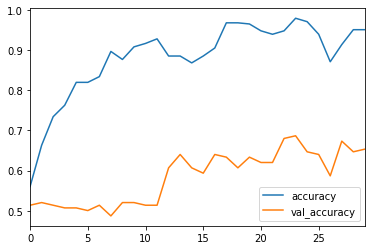

In [28]:
results[['accuracy', 'val_accuracy']].plot()